In [94]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import speech_recognition as sr

import os
for dirname, _, filenames in os.walk('C:\Files\Amrita\Sem - 6\speech\Project\mini\\archive\dataset'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

import warnings
warnings.filterwarnings("ignore")

r = sr.Recognizer()


C:\Files\Amrita\Sem - 6\speech\Project\mini\archive\dataset\test\test.wav
C:\Files\Amrita\Sem - 6\speech\Project\mini\archive\dataset\train\Person1\Recording-1.wav
C:\Files\Amrita\Sem - 6\speech\Project\mini\archive\dataset\train\Person1\Recording-10.wav
C:\Files\Amrita\Sem - 6\speech\Project\mini\archive\dataset\train\Person1\Recording-11.wav
C:\Files\Amrita\Sem - 6\speech\Project\mini\archive\dataset\train\Person1\Recording-2.wav
C:\Files\Amrita\Sem - 6\speech\Project\mini\archive\dataset\train\Person1\Recording-3.wav
C:\Files\Amrita\Sem - 6\speech\Project\mini\archive\dataset\train\Person1\Recording-4.wav
C:\Files\Amrita\Sem - 6\speech\Project\mini\archive\dataset\train\Person1\Recording-5.wav
C:\Files\Amrita\Sem - 6\speech\Project\mini\archive\dataset\train\Person1\Recording-6.wav
C:\Files\Amrita\Sem - 6\speech\Project\mini\archive\dataset\train\Person1\Recording-7.wav
C:\Files\Amrita\Sem - 6\speech\Project\mini\archive\dataset\train\Person1\Recording-8.wav
C:\Files\Amrita\Sem - 6\

In [95]:
import glob
import librosa
import librosa.display
from IPython.display import Audio, display
import matplotlib.pyplot as plt


# Getting file paths and audio class 

In [96]:
import glob

def read_path_audio_and_target(is_train=True):
    # Initialize lists to store paths and targets
    paths, targets = [], []
    
    # Determine whether it's train or validation set
    if is_train:
        name = 'train'
    else:
        name = 'valid'
        
    # Iterate over classes (in this case, 'Person1' and 'Person2')
    for cls in ['Person1', 'Person2']:
        # Get paths for audio files in the specified directory
        path = glob.glob(f'C:\\Files\\Amrita\\Sem - 6\\speech\\Project\\mini\\archive\\dataset\\{name}\\{cls}\\*')
    
        # Assign targets based on the class
        if cls == 'Person1':
            target = [0 for _ in range(len(path))]  # Target 0 for 'Person1'
        else:
            target = [1 for _ in range(len(path))]  # Target 1 for 'Person2'

        # Extend the lists with the paths and targets obtained
        paths.extend(path)
        targets.extend(target)
    
    return paths, targets


In [97]:
paths_train, targets_train = read_path_audio_and_target(is_train=True)
paths_test, targets_test = read_path_audio_and_target(is_train=False)

In [98]:
print(paths_train[0])

# Load audio file
sample_student, sr = librosa.load(paths_train[0])

# Display audio
display(Audio(sample_student, rate=sr))

# Recognize speech
import speech_recognition as sr
with sr.AudioFile(paths_train[0]) as source:
    x = r.record(source)
    transcript = r.recognize_google(x)

print(transcript)


C:\Files\Amrita\Sem - 6\speech\Project\mini\archive\dataset\train\Person1\Recording-1.wav


liver is normal in size and with normal parenchymal echogenicity with no sign of space occupying lesion or bile ducts dilation


In [99]:
print(paths_train[-1])
sample_professor, sr = librosa.load(paths_train[-1])
display(Audio(sample_professor, rate=sr))
import speech_recognition as sr
with sr.AudioFile(paths_train[-1]) as source:
    x = r.record(source)
    transcript = r.recognize_google(x)
print(transcript)

C:\Files\Amrita\Sem - 6\speech\Project\mini\archive\dataset\train\Person2\rec9.wav


liver is normal in size and with normal parenchymal echogenicity with no sign of space occupying lesion or bile ducts dilatation intrahepatic biliary tree is deleted


# Reshape audio and classes 

In [100]:
def reshape_sound_and_target(path_sound, targets, segment_size_t=1):
    """
    
    Parameters:
    path_sound, 
    targets, 
    segment_size_t: segment size in seconds
    """
    segments_sound, segments_target = [], []
    
    for i in range(len(path_sound)):
        # load
        y, sr = librosa.load(path_sound[i])

        signal_len = len(y) 
        # segment size in samples
        segment_size = int(segment_size_t * sr)  
        # Break signal into list of segments in a single-line Python code
        segments = [y[x:x + segment_size] for x in np.arange(0, signal_len, segment_size)]

        target = [targets[i] for _ in range(len(segments))]

        segments_sound.extend(segments)
        segments_target.extend(target)

    segments_sound = np.array(segments_sound)
    segments_target = np.array(segments_target)
    
    return segments_sound, segments_target, sr

In [101]:
segment_size_t = 0.5

segments_sound_train, segments_target_train, sr = reshape_sound_and_target(paths_train, targets_train, segment_size_t)
segments_sound_test, segments_target_test, _ = reshape_sound_and_target(paths_test, targets_test, segment_size_t)

In [102]:
segments_sound_train.shape, segments_target_train.shape, sr

((397,), (397,), 22050)

In [103]:
segments_sound_train

array([array([ 0.0000000e+00,  0.0000000e+00,  0.0000000e+00, ...,
               1.1366325e-08,  1.6832655e-07, -3.1937850e-07], dtype=float32),
       array([ 4.5239986e-07, -5.7464018e-07,  6.9350824e-07, ...,
               0.0000000e+00,  0.0000000e+00,  0.0000000e+00], dtype=float32),
       array([ 0.000000e+00,  0.000000e+00,  0.000000e+00, ...,  6.622196e-04,
               3.892614e-05, -4.183102e-03], dtype=float32)                   ,
       array([-0.00869595, -0.00781743, -0.00066728, ...,  0.05036956,
               0.04418923,  0.0272423 ], dtype=float32)               ,
       array([ 0.01665733,  0.01939155,  0.02830388, ..., -0.0237448 ,
              -0.02825128, -0.03261034], dtype=float32)               ,
       array([-0.03682701, -0.04126111, -0.04587073, ...,  0.0008559 ,
              -0.00703653,  0.00774417], dtype=float32)               ,
       array([ 0.00156845, -0.00701289,  0.00648479, ...,  0.08064913,
               0.06954037,  0.05865563], dtype=fl

# Create Feature

In [104]:
import librosa
import numpy as np

def create_feature(segments, sr):
    # Define a list of features to extract along with corresponding librosa functions
    features = [
            ('chroma_stft', librosa.feature.chroma_stft),
            ('rms', librosa.feature.rms),
            ('spectral_centroid', librosa.feature.spectral_centroid),
            ('spectral_bandwidth', librosa.feature.spectral_bandwidth),
            ('spectral_rolloff', librosa.feature.spectral_rolloff),
            ('zero_crossing_rate', librosa.feature.zero_crossing_rate),
            ('mfcc', librosa.feature.mfcc)
    ]

    # Initialize an empty list to store feature vectors for each segment
    features_segmentation = []

    # Iterate over each segment provided
    for seg in segments:
        feature_segmentation = []  # Initialize an empty list for features of this segment
        try:
            # Iterate over each feature and its corresponding function
            for name, func in features:

                # For features 'rms' and 'zero_crossing_rate', compute mean over the segment
                if name in ['rms', 'zero_crossing_rate']:
                    y0 = func(y=seg)
                    feature_segmentation.append(np.mean(y0))

                # For 'mfcc', compute mean for each coefficient over the segment
                elif name == 'mfcc':
                    y0 = func(y=seg, sr=sr)
                    for i, m in enumerate(y0, 1):
                        feature_segmentation.append(np.mean(m))

                # For other features, compute mean over the segment
                else:
                    y0 = func(y=seg, sr=sr)
                    feature_segmentation.append(np.mean(y0)) 

        except Exception as e:
            print(e)  # Print any exceptions that occur during feature extraction

        # Append the feature vector of this segment to the list of all segments' features
        features_segmentation.append(feature_segmentation)

    # Convert the list of feature vectors into a numpy array
    features_segmentation = np.array(features_segmentation)
    return features_segmentation


In [105]:
feature_train = create_feature(segments_sound_train, sr)
feature_test = create_feature(segments_sound_test, sr)

feature_train.shape, feature_test.shape

((397, 26), (63, 26))

In [106]:
pd.DataFrame(feature_train)

0         1            2            3            4         5   \
0    0.399792  0.000196  1599.677754  1409.256860  2870.278098  0.114724   
1    0.183251  0.000239  2012.018121   859.792161  2796.869451  0.144398   
2    0.246888  0.018114  1509.528530  1364.404478  3094.908558  0.056419   
3    0.218759  0.041634  2172.421820  1851.205399  4497.013716  0.085915   
4    0.255696  0.032844  1986.091935  1756.114334  4075.158691  0.116633   
..        ...       ...          ...          ...          ...       ...   
392  0.532419  0.052586  2434.930244  2538.729681  5454.751864  0.099365   
393  0.396834  0.117089  1694.753224  1990.338285  3339.114657  0.052912   
394  0.293299  0.083266  2434.673459  2173.939330  4569.932972  0.093639   
395  0.344225  0.107805  3117.324748  2497.689129  5821.305708  0.110884   
396  0.361300  0.024394  1931.822434  2233.243374  4068.579102  0.068414   

              6           7          8          9   ...         16         17  \
0    -885.966553   54.357971 -22.782696  40.973686  ...  -8.390895  10.842916   
1   -1016.856445  -10.963920  -6.599118  32.182251  ...  -1.921560   5.142223   
2    -551.031006   42.228863  -5.219159  43.123665  ...  -4.870753  -5.130372   
3    -324.340759   98.539894 -58.712269  76.147835  ...  -8.688379  -8.295956   
4    -349.950287  116.074661 -43.869228  86.189262  ...  -2.318413  -3.722954   
..           ...         ...        ...        ...  ...        ...        ...   
392  -286.197937   87.120537   5.118000  40.422073  ... -12.595365  21.707567   
393  -240.846771  111.052177  -6.698328  54.167362  ... -21.721546  15.807369   
394  -223.117691   76.715385 -11.375566  76.806915  ... -30.748049  15.649041   
395  -180.288727   51.668827  16.282721  62.817554  ... -28.045094  20.295908   
396  -297.553131  108.007118  -0.587167  41.336544  ... -17.728439  10.152787   

            18        19         20         21        22         23  \
0     7.062852  2.454094   7.147050   2.299561 -0.149169   5.175878   
1     0.255345  4.158930  -0.578000   2.589352  3.320588  -1.595465   
2   -10.651258 -1.805225  -3.043974  -6.708501 -2.663577  -6.864581   
3   -14.877314 -2.900624  -9.527152 -18.403187 -6.386992 -16.923326   
4   -13.203634 -3.356310 -11.224959 -17.006836 -3.907774 -11.949515   
..         ...       ...        ...        ...       ...        ...   
392  -6.121235 -2.516598   6.452754  -2.920289  1.660787   1.704870   
393 -14.696765  1.033676   8.883960 -13.197323  2.335282   2.476037   
394 -28.801830  0.406394  11.530837 -20.961901  0.317986   6.533966   
395 -13.708506 -5.756346   8.309773 -15.435413  3.820477   6.815138   
396   0.169276 -2.413484   3.265014  -9.440981 -6.032186   3.266986   

            24         25  
0     3.371058   2.061149  
1     4.480531   0.610783  
2    -6.577562  -7.925067  
3   -17.045542 -15.342441  
4   -17.307100 -11.185749  
..         ...        ...  
392   2.368752  -3.053218  
393  -2.385035  -2.905618  
394  -5.105293   0.810048  
395  -2.445802  -8.651812  
396  -2.613853  -5.859563  

[397 rows x 26 columns]

# StandardScaler

In [107]:
from sklearn.preprocessing import StandardScaler

# Initialize a StandardScaler object
scaler = StandardScaler()

# Fit the scaler to the training features to compute mean and standard deviation
scaler.fit(feature_train)


StandardScaler()

In [108]:
feature_train_scaler = scaler.transform(feature_train)
feature_test_scaler = scaler.transform(feature_test)

feature_train_scaler.shape, feature_test_scaler.shape

((397, 26), (63, 26))

## Histogram training data of each feuture for Person1 (Blue) and Person2 (orange) 

Exception ignored in: <function Wave_write.__del__ at 0x000002C285EC4C10>
Traceback (most recent call last):
  File "c:\Users\jayan\AppData\Local\Programs\Python\Python310\lib\wave.py", line 326, in __del__
    self.close()
  File "c:\Users\jayan\AppData\Local\Programs\Python\Python310\lib\wave.py", line 444, in close
    self._ensure_header_written(0)
  File "c:\Users\jayan\AppData\Local\Programs\Python\Python310\lib\wave.py", line 464, in _ensure_header_written
    raise Error('sample width not specified')
wave.Error: sample width not specified
Exception ignored in: <function Wave_write.__del__ at 0x000002C285EC4C10>
Traceback (most recent call last):
  File "c:\Users\jayan\AppData\Local\Programs\Python\Python310\lib\wave.py", line 326, in __del__
    self.close()
  File "c:\Users\jayan\AppData\Local\Programs\Python\Python310\lib\wave.py", line 444, in close
    self._ensure_header_written(0)
  File "c:\Users\jayan\AppData\Local\Programs\Python\Python310\lib\wave.py", line 464, in _e

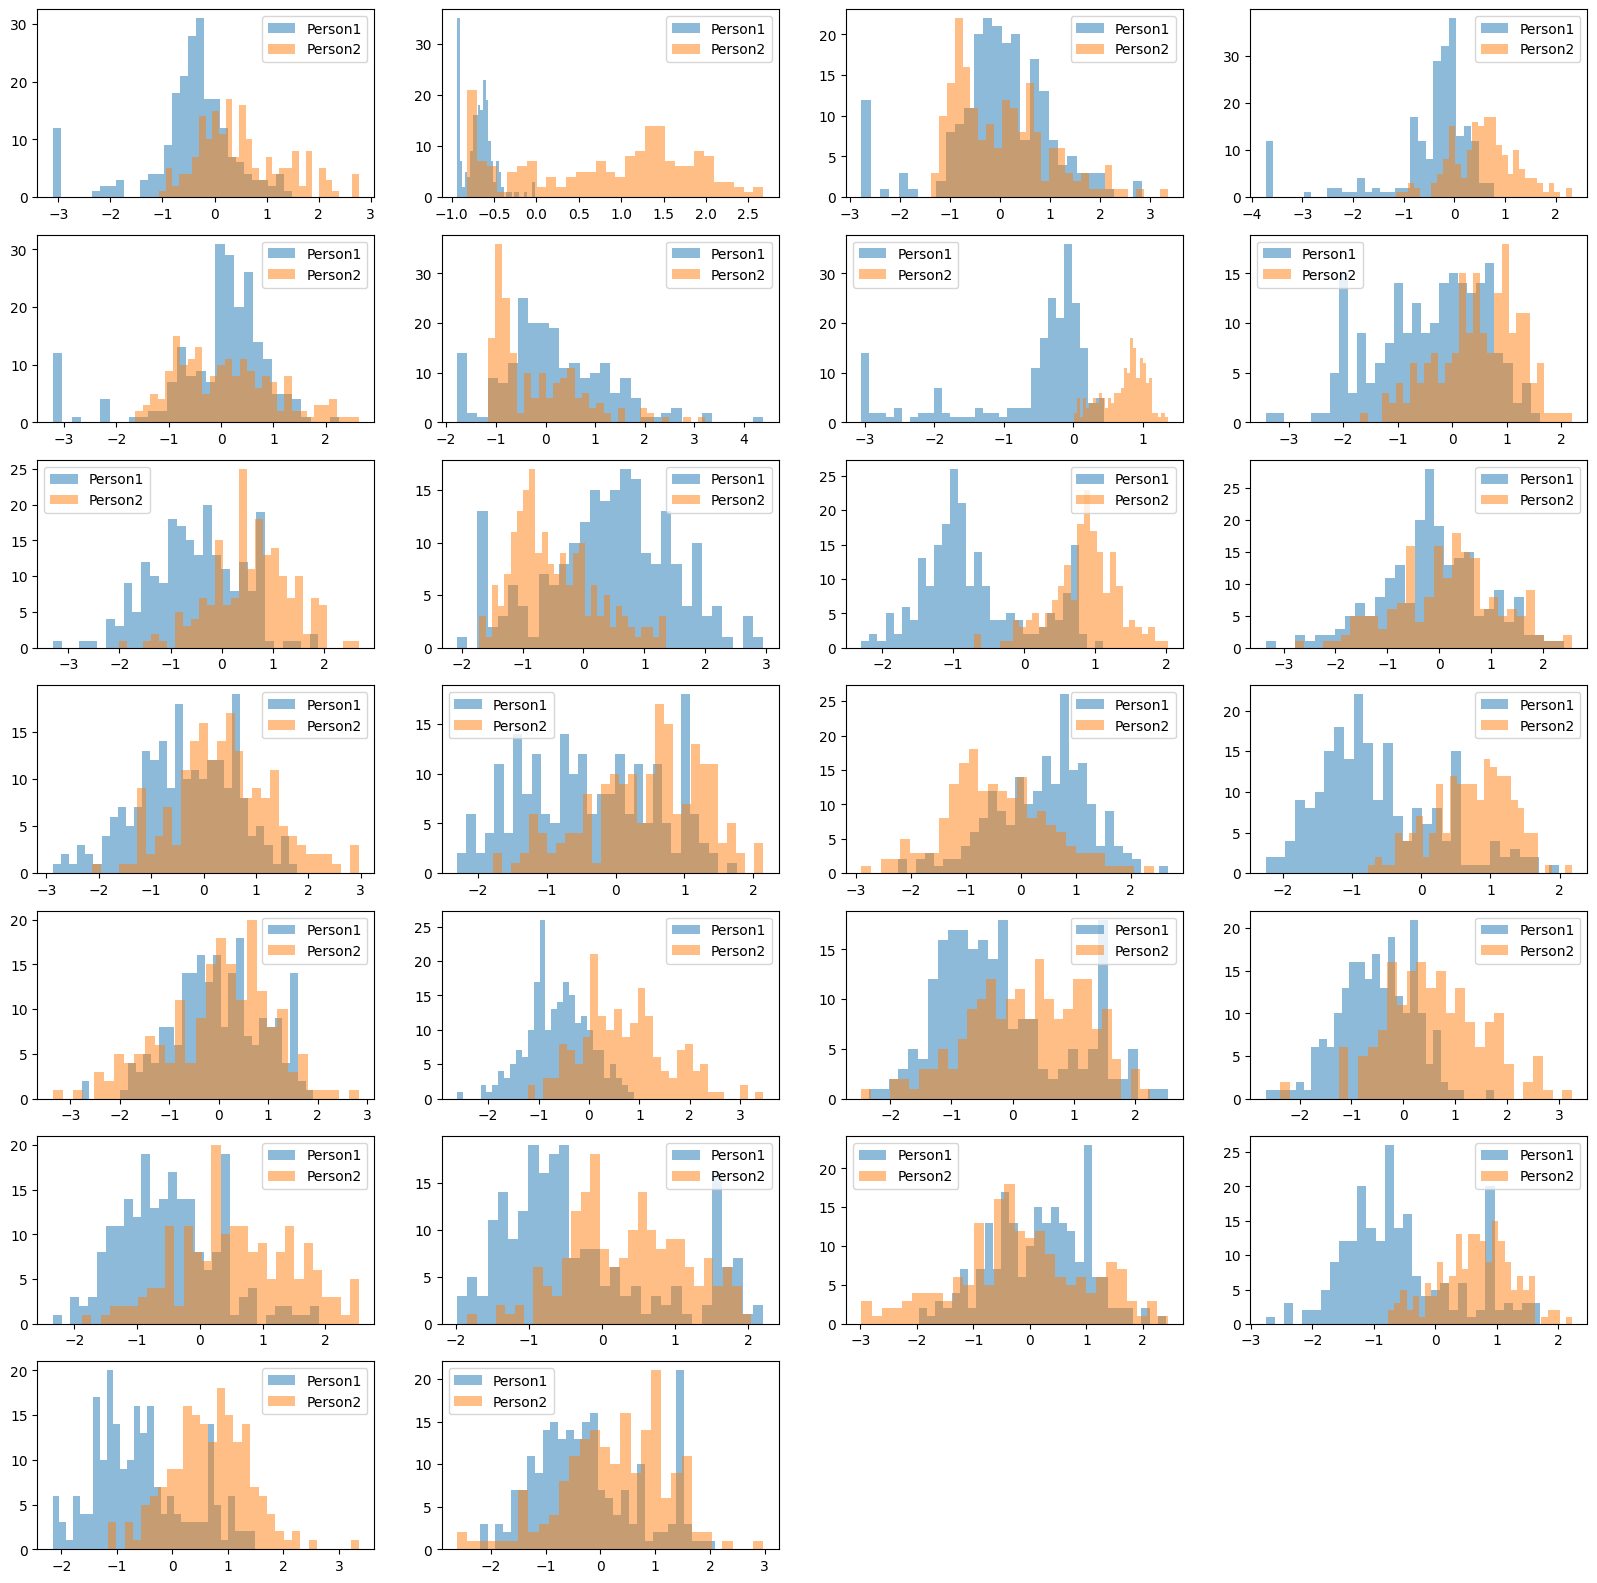

In [109]:
plt.figure(figsize=(20,20))
for i in range(0, feature_train_scaler.shape[1]):
    plt.subplot(7,4,i+1)
    plt.hist(feature_train_scaler[:,i][segments_target_train == 0], bins=30, alpha=0.5)
    plt.hist(feature_train_scaler[:,i][segments_target_train == 1], bins=30, alpha=0.5)
    plt.legend(['Person1', 'Person2'])
plt.show()

# Model

In [110]:
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report

## Model - SVC

In [111]:
from sklearn.svm import SVC

# Initialize a Support Vector Classification (SVC) model with specified regularization parameter C=0.1
model_svc = SVC(C=0.1)

# Fit the SVC model to the scaled training features and corresponding target segments
# feature_train_scaler: Scaled training features obtained from StandardScaler
# segments_target_train: Target segments corresponding to the training features
model_svc.fit(feature_train_scaler, segments_target_train)


SVC(C=0.1)

In [112]:
pred = model_svc.predict(feature_test_scaler)
print(classification_report(segments_target_test, pred, target_names=['Person1', 'Person2']))

              precision    recall  f1-score   support

     Person1       1.00      1.00      1.00        30
     Person2       1.00      1.00      1.00        33

    accuracy                           1.00        63
   macro avg       1.00      1.00      1.00        63
weighted avg       1.00      1.00      1.00        63



## Model - RandomForestClassifier

In [113]:
model_rfc = RandomForestClassifier(random_state=13)
model_rfc.fit(feature_train_scaler, segments_target_train)

RandomForestClassifier(random_state=13)

In [114]:
pred = model_rfc.predict(feature_test_scaler)
print(classification_report(segments_target_test, pred, target_names=['Person1', 'Person2']))

              precision    recall  f1-score   support

     Person1       1.00      1.00      1.00        30
     Person2       1.00      1.00      1.00        33

    accuracy                           1.00        63
   macro avg       1.00      1.00      1.00        63
weighted avg       1.00      1.00      1.00        63



# Segmenting Person1 and Person2 audio in test data 

In [115]:
def read_and_reshape_sound(path, segment_size_t = 0.5):
    # load
    sound, sr = librosa.load(path)

    signal_len = len(sound)
    # segment size in samples
    segment_size = int(segment_size_t * sr)
    # Break signal into list of segments in a single-line Python code
    segments = np.array([sound[x:x + segment_size] for x in np.arange(0, signal_len, segment_size)])
    return segments, sr

In [116]:
path = 'C:\\Files\\Amrita\\Sem - 6\\speech\\Project\\mini\\archive\\dataset\\test\\test.wav'
segment_size_t = 0.5
segments, sr = read_and_reshape_sound(path, segment_size_t)

display(Audio(np.concatenate(segments), rate=sr))



In [117]:
feature_valid = create_feature(segments, sr)
feature_valid_scaler = scaler.transform(feature_valid)
feature_valid_scaler.shape

(66, 26)

In [118]:
pred = model_rfc.predict(feature_valid_scaler)
pred

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

## Segmenting audio Person1 and Person2

In [119]:
Person1_sound = np.concatenate(segments[pred == 0])
Person2_sound = np.concatenate(segments[pred == 1])
import numpy as np
from scipy.io import wavfile

# Assuming Person1_sound and Person2_sound are NumPy arrays containing audio data

# Set the sample rate (replace 44100 with your actual sample rate if different)
sample_rate = 44100

# Save Person1_sound as a .wav file
wavfile.write("Person1_sound.wav", sample_rate, Person1_sound)

# Save Person2_sound as a .wav file
wavfile.write("Person2_sound.wav", sample_rate, Person2_sound)



## Person1 segmented sound 

In [120]:
display(Audio(Person1_sound, rate=sr))

## Person2 segmented sound 

In [121]:
display(Audio(Person2_sound, rate=sr))